In [52]:
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import numpy as np
import glob
import os

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/Kaggel'

In [10]:
%cd /content/gdrive/MyDrive/Kaggel

/content/gdrive/MyDrive/Kaggel


In [11]:
!ls

fruit-recognition  kaggle.json


In [12]:
!kaggle datasets download -d sshikamaru/fruit-recognition

Dataset URL: https://www.kaggle.com/datasets/sshikamaru/fruit-recognition
License(s): other
 87% 89.0M/102M [00:01<00:00, 58.3MB/s]
100% 102M/102M [00:01<00:00, 60.5MB/s] 


In [13]:
!mkdir fruit-recognition
!mv fruit-recognition.zip fruit-recognition

mkdir: cannot create directory ‘fruit-recognition’: File exists


In [14]:
%cd fruit-recognition/

/content/gdrive/MyDrive/Kaggel/fruit-recognition


In [15]:
!unzip fruit-recognition.zip

Archive:  fruit-recognition.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [16]:
test_imagenes = []
test_etiquetas = []

In [32]:
train_imagenes = []
train_etiquetas = []

# Ruta de la carpeta principal
carpeta_principal = '/content/gdrive/MyDrive/Kaggel/fruit-recognition/train/train'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
z = 0
for subcarpeta in subcarpetas:

    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario

        for x in glob.iglob(f'{subcarpeta}/*.jpg'):
          print(x)
          train_image = cv2.imread(x)

          # Formato de imagen
          imgz_resized = cv2.resize(train_image, (100,100), )

          # Guardar imagenes y etiquetas
          arreglo_imagen = np.array(imgz_resized)
          train_imagenes.append(arreglo_imagen)
          train_etiquetas.append(z) # Fix: Append the value of z to the list etiquetas
    z += 1

Streaming output truncated to the last 5000 lines.
/content/gdrive/MyDrive/Kaggel/fruit-recognition/train/train/Pepper Green/Pepper Green_304.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/train/train/Pepper Green/Pepper Green_110.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/train/train/Pepper Green/Pepper Green_221.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/train/train/Pepper Green/Pepper Green_291.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/train/train/Pepper Green/Pepper Green_297.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/train/train/Pepper Green/Pepper Green_272.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/train/train/Pepper Green/Pepper Green_332.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/train/train/Pepper Green/Pepper Green_93.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/train/train/Pepper Green/Pepper Green_34.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/train/train/Pepper Green/Pepper Green_63.jpg
/c

In [33]:
etiquetas = np.array(train_etiquetas)

In [34]:
images = np.array(train_imagenes)

In [35]:
np.shape(train_imagenes)

(16854, 100, 100, 3)

In [36]:
len(train_imagenes)

16854

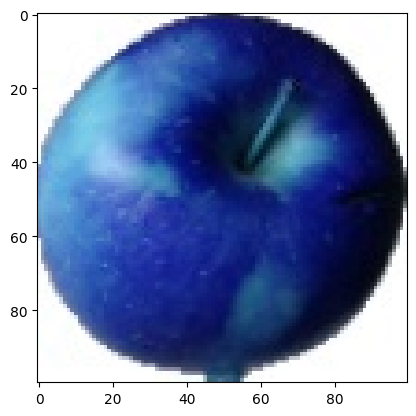

In [37]:
plt.imshow(train_imagenes[1])

In [38]:
test_imagenes = []
test_etiquetas = []

# Ruta de la carpeta principal
carpeta_principal = '/content/gdrive/MyDrive/Kaggel/fruit-recognition/test/test'

# Patrón para encontrar todas las imágenes .jpg dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*.jpg')

# Utiliza glob para encontrar todas las imágenes que coinciden con el patrón
imagenes = glob.glob(patron)

# Itera sobre las imágenes encontradas
for x in imagenes:
    print(x)
    test_image = cv2.imread(x)

    # Formato de imagen
    imgx_resized = cv2.resize(test_image, (100, 100))

    # Guardar imágenes y etiquetas
    arreglo_imagen = np.array(imgx_resized)
    test_imagenes.append(arreglo_imagen)
    test_etiquetas.append(0)  # Si no hay etiquetas específicas, usa un valor por defecto


Streaming output truncated to the last 5000 lines.
/content/gdrive/MyDrive/Kaggel/fruit-recognition/test/test/4640.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/test/test/5267.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/test/test/5203.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/test/test/5198.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/test/test/5094.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/test/test/5017.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/test/test/4988.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/test/test/5325.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/test/test/4824.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/test/test/5002.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/test/test/5068.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/test/test/4873.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/test/test/5028.jpg
/content/gdrive/MyDrive/Kaggel/fruit-recognition/test/test/4664.j

In [39]:
# Normalize pixel values to be between 0 and 1
imgz_normalized = img_resized / 255.0
imgx_normalized = img_resized / 255.0

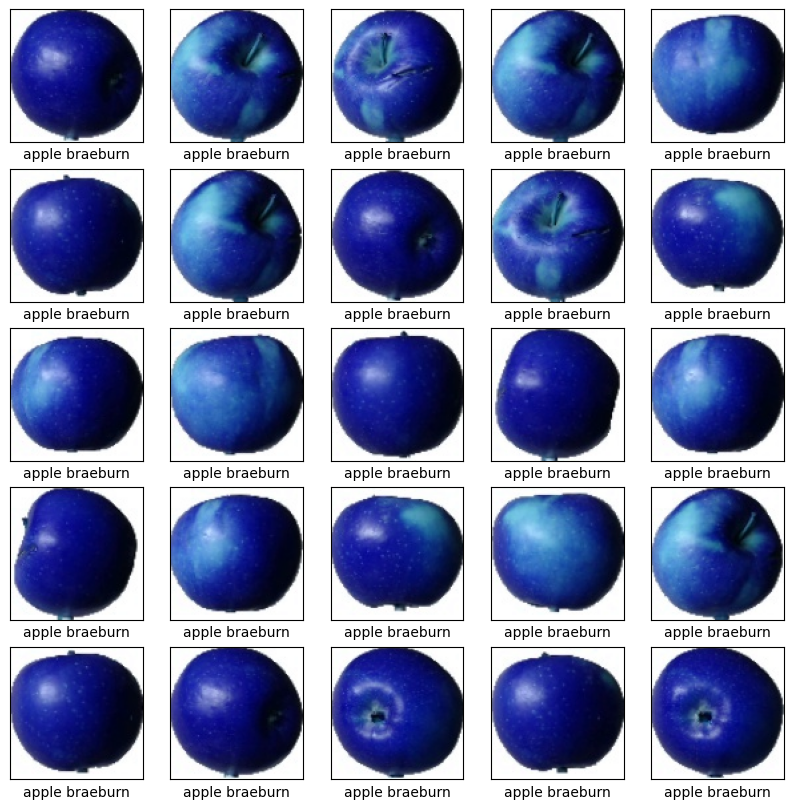

In [44]:
class_names = ['apple braeburn', 'apple granny smith', 'apricot', 'avocado', 'banana','blueberry', 'cactus fruit', 'cantaloupe', 'cherry', 'clementine','corn','cucumber ripe','grape blue','kiwi','lemon','lime','mango','onion white','orange','papaya','passion fruit','peach','pear','pepper green','pepper red','pineapple','plum','pomegranate','potato red','raspberry','strawberry','tomato','watermelon']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imagenes[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_etiquetas[i]])  # Corrected access to train_etiquetas
plt.show()

In [47]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [49]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(33))

In [54]:
#model.compile(optimizer='adam',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             # metrics=['accuracy'])

#history = model.fit(train_imagenes, train_etiquetas, epochs=10,
                   # validation_data=(test_imagenes, test_etiquetas))

In [57]:
import numpy as np

# Convert the train_imagenes list to a NumPy array
train_imagenes_array = np.array(train_imagenes)

# Convert the train_etiquetas list to a NumPy array
train_etiquetas_array = np.array(train_etiquetas)

# Convert the test_imagenes list to a NumPy array
test_imagenes_array = np.array(test_imagenes)

# Convert the test_etiquetas list to a NumPy array
test_etiquetas_array = np.array(test_etiquetas)

# Fit the model using the NumPy arrays
history = model.fit(train_imagenes_array, train_etiquetas_array, epochs=10, validation_data=(test_imagenes_array, test_etiquetas_array))


Epoch 1/10
527/527 [==============================] - 336s 637ms/step - loss: 0.0539 - accuracy: 0.9869 - val_loss: 46.8246 - val_accuracy: 0.0291
Epoch 2/10
527/527 [==============================] - 333s 632ms/step - loss: 0.0404 - accuracy: 0.9924 - val_loss: 39.9120 - val_accuracy: 0.0509
Epoch 3/10
527/527 [==============================] - 336s 638ms/step - loss: 0.0460 - accuracy: 0.9906 - val_loss: 55.0017 - val_accuracy: 0.0273
Epoch 4/10
527/527 [==============================] - 319s 606ms/step - loss: 4.7806e-05 - accuracy: 1.0000 - val_loss: 57.2584 - val_accuracy: 0.0271
Epoch 5/10
527/527 [==============================] - 315s 598ms/step - loss: 1.3580e-05 - accuracy: 1.0000 - val_loss: 58.7215 - val_accuracy: 0.0271
Epoch 6/10
527/527 [==============================] - 335s 635ms/step - loss: 7.2917e-06 - accuracy: 1.0000 - val_loss: 59.5963 - val_accuracy: 0.0269
Epoch 7/10
527/527 [==============================] - 343s 650ms/step - loss: 4.7672e-06 - accuracy: 1.000

177/177 - 31s - loss: 62.3048 - accuracy: 0.0268 - 31s/epoch - 174ms/step
Test accuracy: 0.026768304407596588


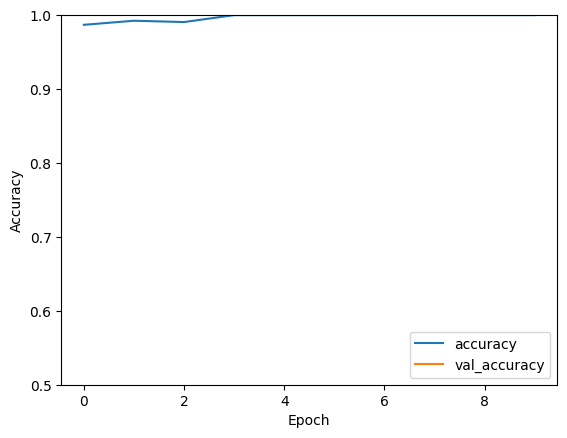

In [63]:

# Graficar los resultados del entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_imagenes_array, test_etiquetas_array, verbose=2)

print(f"Test accuracy: {test_acc}")


In [64]:
print(test_acc)

0.026768304407596588


In [67]:
#Predicciones

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

# Realiza las predicciones
predictions = probability_model.predict(test_imagenes_array)

# Muestra algunas predicciones para verificar
print(predictions[:5])


177/177 [==============================] - 31s 173ms/step
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 9.99999940e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.51772970e-33 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.14275957e-08 3.15501723e-07 8.54485761e-03 7.60409902e-10
  9.90600602e-10 8.36123332e-15 5.82564448e-04 6.69896126e-01
  3.69588662e-08 7.67574385e-02 1.50939018e-01 4.96090070e-06
  1.19762600e-09 2.45499973e-06 1.58274695e-02 2.44979681e-09
  4.65130278e-12 1.18791247e-02 1.45031260e-02 3.67122794e-07
  7.73282588e-13 9.73952238e-11 5.64885283e-07 1.55133133e-12
  3.97564727e-05 7.59434915e-05 1.69497888e-11 5.4776595

In [90]:
def plot_image(i, predictions_array, true_label, img):

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

TypeError: Invalid shape (5641, 100, 100, 3) for image data

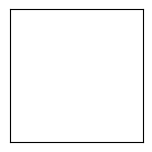

In [107]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_etiquetas, test_imagenes)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_etiquetas)
plt.tight_layout()
plt.show()

In [98]:
#Modelo entrenado
img = test_imagenes[1]

print(img.shape)

(100, 100, 3)


In [99]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 100, 100, 3)


In [100]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 88ms/step
[[2.1427470e-08 3.1550019e-07 8.5448446e-03 7.6040985e-10 9.9059860e-10
  8.3611842e-15 5.8256299e-04 6.6989732e-01 3.6958788e-08 7.6756909e-02
  1.5093885e-01 4.9609093e-06 1.1976234e-09 2.4549993e-06 1.5827378e-02
  2.4498059e-09 4.6513110e-12 1.1879095e-02 1.4503076e-02 3.6712206e-07
  7.7328394e-13 9.7395030e-11 5.6488574e-07 1.5513281e-12 3.9756356e-05
  7.5943193e-05 1.6949785e-11 5.4776482e-08 1.7432336e-05 7.4388553e-09
  3.2751043e-08 5.0928090e-02 1.4822345e-08]]
